In [1]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dotenv.load_dotenv('../.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

In [2]:
df = pd.read_csv(os.environ.get('PATH_OPENSKY') + '/results/agg_user_data.csv', index_col=0)
df

,instance,langs,min_date,max_date,mean_sent_score,mean_like_count,mean_reply_count,mean_repost_count,n_posts,caught_exception
288811,bsky.social,jpn,1976-05-31 14:49:40.250,1976-05-31 15:06:01.140,NaN,4.636364,0.000000,0.242424,33.0,False
527934,bsky.social,"eng,heb,jpn,fra",1976-05-30 12:23:51.918,1976-05-31 15:06:22.021,0.824409,18.211009,0.616972,7.187691,2616.0,False
1632691,bsky.social,spa,1976-05-30 13:16:31.226,1976-05-30 13:16:31.226,NaN,2.000000,1.000000,0.000000,1.0,False
1909409,bsky.social,jpn,1976-05-31 14:48:11.431,1976-05-31 14:48:11.431,NaN,1.000000,0.000000,0.000000,1.0,False
2902501,bsky.social,kor,1976-05-30 12:59:01.311,1976-05-31 14:51:00.209,NaN,0.500000,0.100000,0.000000,10.0,False
...,...,...,...,...,...,...,...,...,...,...
495380,bsky.social,eng,1976-05-30 12:40:30.146,1976-05-31 14:48:01.457,0.790667,0.800000,0.173333,0.026667,75.0,False
502241,bsky.social,eng,1976-05-31 14:47:42.021,1976-05-31 14:47:42.304,0.800889,3.777778,1.444444,1.222222,9.0,False
1652601,bsky.social,"spa,eng,cat,jpn",1976-05-30 12:09:11.814,1976-05-31 15:03:31.700,0.770500,87.579186,3.936652,33.321267,221.0,False
1838341,bsky.social,por,1976-05-30 12:23:50.927,1976-05-30 12:24:10.012,NaN,13.600000,1.400000,3.400000,5.0,False


In [4]:
df.langs = df.langs.str.split(',')
df

,instance,langs,min_date,max_date,mean_sent_score,mean_like_count,mean_reply_count,mean_repost_count,n_posts,caught_exception
288811,bsky.social,[jpn],1976-05-31 14:49:40.250,1976-05-31 15:06:01.140,NaN,4.636364,0.000000,0.242424,33.0,False
527934,bsky.social,"[eng, heb, jpn, fra]",1976-05-30 12:23:51.918,1976-05-31 15:06:22.021,0.824409,18.211009,0.616972,7.187691,2616.0,False
1632691,bsky.social,[spa],1976-05-30 13:16:31.226,1976-05-30 13:16:31.226,NaN,2.000000,1.000000,0.000000,1.0,False
1909409,bsky.social,[jpn],1976-05-31 14:48:11.431,1976-05-31 14:48:11.431,NaN,1.000000,0.000000,0.000000,1.0,False
2902501,bsky.social,[kor],1976-05-30 12:59:01.311,1976-05-31 14:51:00.209,NaN,0.500000,0.100000,0.000000,10.0,False
...,...,...,...,...,...,...,...,...,...,...
495380,bsky.social,[eng],1976-05-30 12:40:30.146,1976-05-31 14:48:01.457,0.790667,0.800000,0.173333,0.026667,75.0,False
502241,bsky.social,[eng],1976-05-31 14:47:42.021,1976-05-31 14:47:42.304,0.800889,3.777778,1.444444,1.222222,9.0,False
1652601,bsky.social,"[spa, eng, cat, jpn]",1976-05-30 12:09:11.814,1976-05-31 15:03:31.700,0.770500,87.579186,3.936652,33.321267,221.0,False
1838341,bsky.social,[por],1976-05-30 12:23:50.927,1976-05-30 12:24:10.012,NaN,13.600000,1.400000,3.400000,5.0,False


<Axes: >

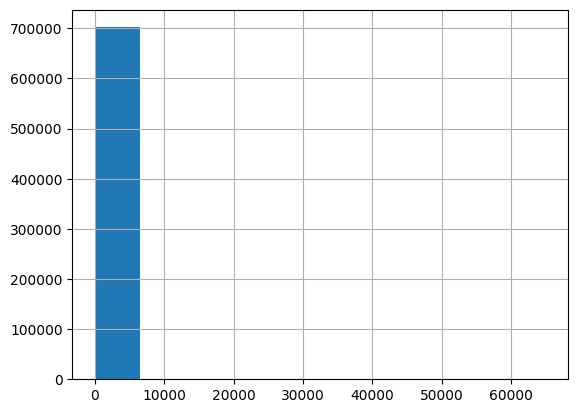

In [3]:
df.n_posts.hist()

In [5]:
df.sort_values('n_posts', ascending=False)

,instance,langs,min_date,max_date,mean_sent_score,mean_like_count,mean_reply_count,mean_repost_count,n_posts,caught_exception
148623,bsky.social,",ind,nob,fra,kor,ces,lat,hun,hin,heb,nld,bel,e...",1976-05-30 11:37:52.115,1976-05-31 15:06:22.355,0.819583,32.899915,1.052604,6.453604,64995.0,False
683,bsky.social,",run,vie,aka,nob,srp,fra,cos,ido,kor,ces,lat,h...",1976-05-30 11:35:11.457,1976-05-31 15:06:22.358,0.742354,134.434364,4.535742,34.127506,63189.0,False
46821,gay,"ind,aka,nob,srp,fra,kor,ces,aar,hye,hun,sqi,he...",1976-05-30 11:37:52.115,1976-05-31 15:06:22.350,0.774924,41.060469,2.189846,9.618365,62793.0,False
33188,bsky.social,",vie,aka,nob,srp,fra,que,kor,ces,lat,hye,hin,s...",1976-05-30 11:35:01.002,1976-05-31 15:06:22.359,0.731904,101.353458,3.341928,27.249319,62791.0,False
273232,bsky.social,"ind,vie,aka,srp,fra,asm,ido,kor,ces,lat,nld,gl...",1976-05-30 11:36:41.529,1976-05-31 15:06:21.633,0.776451,7.820078,0.404967,4.434356,61521.0,False
...,...,...,...,...,...,...,...,...,...,...
130660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1104506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3278138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1166935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
sys.path.append('../')
from user_eval import get_df_posts

get_df_posts(148623)

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,124959016,148623,bsky.social,1976-05-31 15:06:22.142,Sonia Delaunay \nElectric prism,[eng],23,0,5,NaN,NaN,NaN,NaN,48926177.0,583457.0,NaN,NaN,None,1.0,0.885
1,124959017,148623,bsky.social,1976-05-31 15:06:22.141,Paul Cézanne \nThree Skulls on an Oriental Carpet,[eng],8,0,1,NaN,NaN,NaN,NaN,82963084.0,583457.0,NaN,NaN,None,1.0,0.877
2,124959018,148623,bsky.social,1976-05-31 15:06:22.142,Juan Carlos Castagnino \nNoturno,[eng],10,0,1,NaN,NaN,NaN,NaN,82963083.0,583457.0,NaN,NaN,None,1.0,0.908
3,124959019,148623,bsky.social,1976-05-31 14:47:11.016,"Aberdeen and Rockfish Railroad, North Carolina",None,7,0,2,NaN,NaN,NaN,NaN,66508414.0,643885.0,NaN,NaN,None,NaN,NaN
4,124959020,148623,bsky.social,1976-05-31 14:47:50.926,Pond at dawn.,None,7,0,2,NaN,NaN,NaN,NaN,124959021.0,643885.0,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64990,125032507,148623,bsky.social,1976-05-30 12:44:31.519,🤣🤣🤣,[spa],1,0,0,37029942.0,451381.0,37029942.0,451381.0,NaN,NaN,NaN,NaN,None,NaN,NaN
64991,125032508,148623,bsky.social,1976-05-30 12:24:20.205,I like it here and I don’t think a mega corp T...,"[eng, spa]",6735,218,821,NaN,NaN,NaN,NaN,221315.0,131.0,NaN,NaN,None,NaN,NaN
64992,125032509,148623,bsky.social,1976-05-30 12:43:21.800,No tengo ni idea de fútbol y aún así me da asc...,[spa],9,0,3,NaN,NaN,NaN,NaN,94654441.0,24639.0,NaN,NaN,None,NaN,NaN
64993,125032510,148623,bsky.social,1976-05-30 12:44:31.418,🤣🤣🤣,[spa],1,1,0,4635200.0,241757.0,4635200.0,241757.0,NaN,NaN,NaN,NaN,None,NaN,NaN


In [5]:
df[~df.mean_sent_score.isna()]

,instance,langs,min_date,max_date,mean_sent_score,mean_like_count,mean_reply_count,mean_repost_count,n_posts,caught_exception
527934,bsky.social,"[eng, heb, jpn, fra]",1976-05-30 12:23:51.918,1976-05-31 15:06:22.021,0.824409,18.211009,0.616972,7.187691,2616.0,False
141692,bsky.social,"[eng, fra]",1976-05-30 13:15:01.329,1976-05-31 15:04:30.800,0.709000,25.297619,1.779762,10.720238,168.0,False
2668569,bsky.social,[eng],1976-05-30 13:15:02.253,1976-05-31 14:31:12.132,0.679885,49.153846,1.269231,14.269231,26.0,False
317609,com,"[spa, eng, nld, fra, deu]",1976-05-30 12:23:31.840,1976-05-31 15:06:22.005,0.753238,13.182127,0.710138,5.808800,4409.0,False
1981116,bsky.social,"[eng, fin]",1976-05-30 13:31:40.702,1976-05-30 13:31:40.713,0.761000,1.000000,0.500000,0.000000,2.0,False
...,...,...,...,...,...,...,...,...,...,...
204928,bsky.social,"[deu, eng, fra]",1976-05-30 12:42:30.652,1976-05-31 14:51:32.206,0.697714,38.820449,1.201995,13.246883,401.0,False
495380,bsky.social,[eng],1976-05-30 12:40:30.146,1976-05-31 14:48:01.457,0.790667,0.800000,0.173333,0.026667,75.0,False
502241,bsky.social,[eng],1976-05-31 14:47:42.021,1976-05-31 14:47:42.304,0.800889,3.777778,1.444444,1.222222,9.0,False
1652601,bsky.social,"[spa, eng, cat, jpn]",1976-05-30 12:09:11.814,1976-05-31 15:03:31.700,0.770500,87.579186,3.936652,33.321267,221.0,False


(array([6.1000e+01, 1.2600e+02, 3.0500e+02, 9.0900e+02, 2.2370e+03,
        4.1330e+03, 4.5580e+03, 5.7890e+03, 7.8020e+03, 1.2522e+04,
        2.2073e+04, 4.5915e+04, 7.4423e+04, 6.6049e+04, 4.5170e+04,
        2.8299e+04, 1.7711e+04, 1.1944e+04, 8.4040e+03, 9.2240e+03]),
 array([0.336  , 0.36885, 0.4017 , 0.43455, 0.4674 , 0.50025, 0.5331 ,
        0.56595, 0.5988 , 0.63165, 0.6645 , 0.69735, 0.7302 , 0.76305,
        0.7959 , 0.82875, 0.8616 , 0.89445, 0.9273 , 0.96015, 0.993  ]),
 <BarContainer object of 20 artists>)

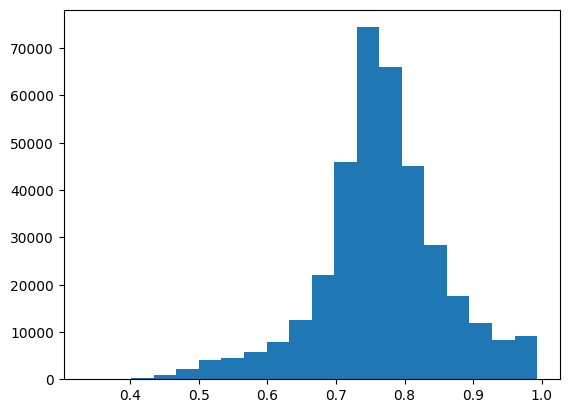

In [6]:
plt.hist(df[~df.mean_sent_score.isna()].mean_sent_score, bins=20)

(array([3.60522e+05, 4.59500e+03, 1.22300e+03, 4.90000e+02, 3.12000e+02,
        1.24000e+02, 9.10000e+01, 9.30000e+01, 2.80000e+01, 3.90000e+01,
        3.00000e+01, 3.00000e+00, 2.50000e+01, 4.00000e+00, 6.90000e+01,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([    0. ,  1385.4,  2770.8,  4156.2,  5541.6,  6927. ,  8312.4,
         9697.8, 11083.2, 12468.6, 13854. , 15239.4, 16624.8, 18010.2,
        19395.6, 20781. , 22166.4, 23551.8, 24937.2, 26322.6, 27708. ]),
 <BarContainer object of 20 artists>)

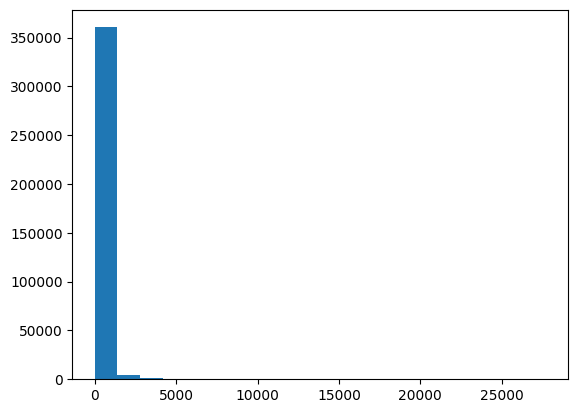

In [18]:
plt.hist(df[~df.mean_sent_score.isna()].mean_like_count, bins=20)

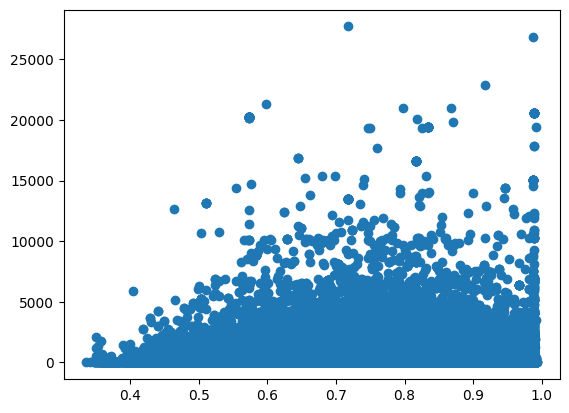

In [7]:
plt.scatter(df[~df.mean_sent_score.isna()].mean_sent_score, df[~df.mean_sent_score.isna()].mean_like_count)

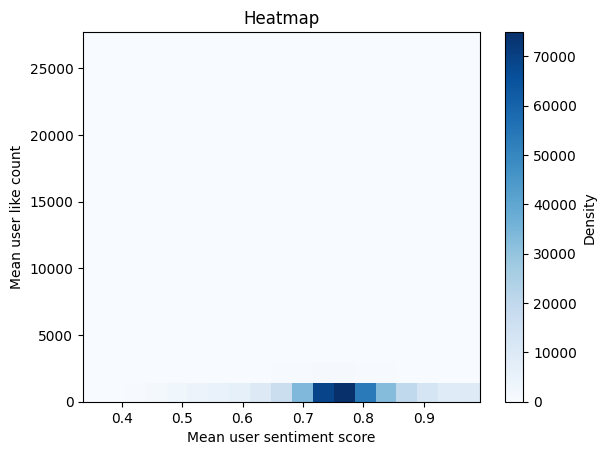

In [17]:
# Create a 2D histogram
gridx = np.linspace(min(df[~df.mean_sent_score.isna()].mean_sent_score), max(df[~df.mean_sent_score.isna()].mean_sent_score), 20)
gridy = np.linspace(min(df[~df.mean_sent_score.isna()].mean_like_count), max(df[~df.mean_sent_score.isna()].mean_like_count) ,20)
heatmap, xedges, yedges = np.histogram2d(df[~df.mean_sent_score.isna()].mean_sent_score, df[~df.mean_sent_score.isna()].mean_like_count, bins=[gridx, gridy])

# Plot the heatmap
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(heatmap.T, origin='lower', extent=myextent, cmap='Blues', aspect='auto')
plt.colorbar(label='Density')
plt.title('Heatmap')
plt.xlabel('Mean user sentiment score')
plt.ylabel('Mean user like count')
plt.show()

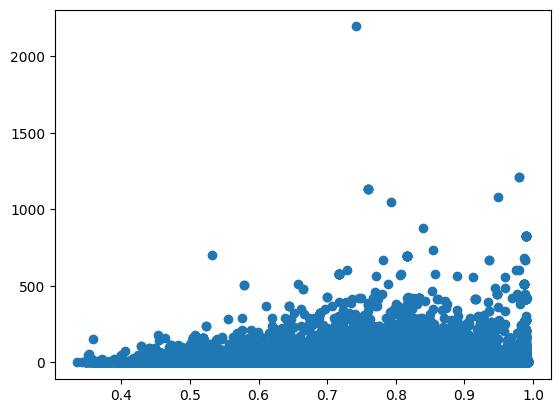

In [8]:
plt.scatter(df[~df.mean_sent_score.isna()].mean_sent_score, df[~df.mean_sent_score.isna()].mean_reply_count)

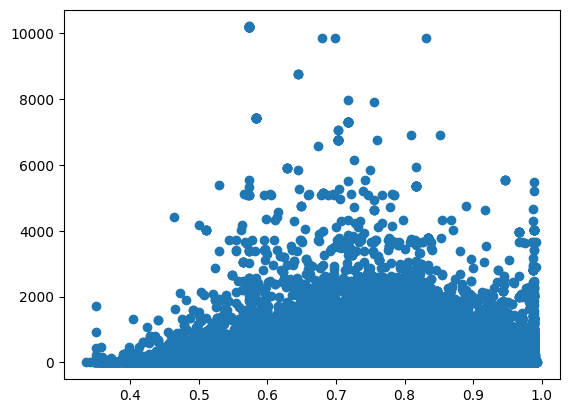

In [10]:
plt.scatter(df[~df.mean_sent_score.isna()].mean_sent_score, df[~df.mean_sent_score.isna()].mean_repost_count)